<a href="https://colab.research.google.com/github/arkeodev/pytorch/blob/main/Transfer_Learning/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\begin{array}{c}
\text{$\Large If\ I\ have\ seen\ further;\ it\ is\ by\ standing\ on\ the\ shoulders\ of\ Giants.$} \\
{\text{{$\small Isaac\ Newton$}}} \\
\end{array}
$$

# Unlocking the Power of Pretrained Models with PyTorch Transfer Learning

In the machine learning and deep learning, building a model from scratch to solve complex problems can be a daunting task. It requires substantial data, immense computational resources, and considerable time. However, what if you could stand on the shoulders of giants and leverage what has already been learned? This is where transfer learning offering a shortcut to advanced deep learning capabilities.

## Types of Learning

<figure>
    <img src="https://raw.githubusercontent.com/arkeodev/pytorch-tutorial/main/Transfer_Learning/images/different_types_of_learning.png" width="800" height="500" alt="Types of Learning">
    <figcaption>Types of Learning</figcaption>
</figure>

### (a) Original Model


The original model, typically a neural network, has been trained on a set of tasks (e.g., task 1 to task m). This model serves as a starting point and has a set of parameters $\theta_s$ for shared layers and $\theta_o$ for task-specific layers.

### (b) Fine-tuning


Fine-tuning involves taking a pre-trained model (on one or more tasks) and continuing the training process to adapt the model to a new task. Here, the shared layers may be frozen or continue to learn at a lower rate (shown in blue), while the new task-specific layers (shown in orange) are trained from scratch or fine-tuned at a higher rate.

### (c) Feature Extraction


Feature extraction keeps the pre-trained layers unchanged and only trains a new set of layers for the new task. The shared layers act as a fixed feature extractor, and only the parameters for the new task are learned (orange part), often using a shallower network than the original.

### (d) Joint Training


Joint training simultaneously trains the model on the original tasks and the new task. This approach can help prevent catastrophic forgetting by ensuring that the model does not lose its performance on the original tasks while learning the new one.

### (e) Learning without Forgetting


This method seeks to train the model on a new task while retaining its performance on the previous tasks. It involves a mechanism that preserves the model's responses for the old tasks while learning the new task, typically by using knowledge distillation or a similar approach to retain the original model's output distributions.

Each approach has its advantages and trade-offs. Fine-tuning and feature extraction are common strategies when you have limited data for the new task. Joint training and learning without forgetting are more sophisticated strategies that seek to maintain or improve performance across all tasks.


## Introduction to Transfer Learning

Transfer learning is akin to learning a new skill with the knowledge you already possess. It involves taking a model trained on one task and repurposing it for another related task. This method is not only efficient but also reduces the need for a large dataset, which is often a bottleneck in machine learning projects.


### Why Transfer Learning?

- **Efficiency**: Jumpstart your project by leveraging existing models that have already learned robust features from large datasets.
- **Performance**: Pretrained models often yield surprisingly good results, even with a relatively small amount of data.

## Pre-trained Model Sources

Here're the some sources that the pretrained models can be found:

| Location | Link(s) |
|----------|---------|
| PyTorch domain libraries | [torchvision.models](https://pytorch.org/vision/stable/models.html), [torchtext.models](https://pytorch.org/text/stable/models.html), [torchaudio.models](https://pytorch.org/audio/stable/models.html), [torchrec.models](https://pytorch.org/torchrec/stable/models.html) |
| HuggingFace Hub | [https://huggingface.co/models](https://huggingface.co/models), [https://huggingface.co/datasets](https://huggingface.co/datasets) |
| timm (PyTorch Image Models) library | [https://github.com/rwightman/pytorch-image-models](https://github.com/rwightman/pytorch-image-models) |
| Paperswithcode | [https://paperswithcode.com/](https://paperswithcode.com/) |

## Transfer Learning with PyTorch's Updated API



PyTorch's TorchVision library provides a plethora of models for tasks including image classification, segmentation, and object detection. However, the conventional API posed several limitations.

### Limitations of the Current API

While TorchVision's `torchvision.models` offers a great starting point for transfer learning, it comes with limitations:

- **Limited Pre-trained Weight Options**: The binary nature of the `pretrained` parameter restricts models to a single set of weights, impeding the adoption of improved or alternative pre-trained weights.
- **Manual Inference Transform Definition**: Users must manually specify the preprocessing steps necessary for model inference, which can be error-prone and reduce model accuracy if done incorrectly.
- **Lack of Metadata**: Essential information regarding the weights, such as category labels and training recipes, is not readily accessible, complicating model utilization and experimentation.

### Introducing the Prototype API

TorchVision addresses these challenges with a new prototype API, enhancing usability and flexibility. Let's explore the improvements offered by this API.

### Step-by-Step Implementation with the New API

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from torchvision import models as PM
from torchvision.transforms.functional import to_pil_image

# Fetch the image from the URL
url = "https://raw.githubusercontent.com/arkeodev/pytorch-tutorial/main/Transfer_Learning/images/istanbul.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Initialize the model with pre-defined weights
weights = PM.ResNet50_Weights.IMAGENET1K_V1
model = PM.resnet50(weights=weights)
model.eval()

# Initialize the inference transforms
preprocess = weights.transforms()

# Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"Category: '{category_name}' \nScore {100 * score:.2f}%")

Category: 'seashore' 
Score 31.20%


This approach simplifies model usage while addressing previous limitations.

### Features of the New API

- **Multi-Weight Support**: By associating each model with an Enum class (e.g., `ResNet50_Weights`), the API now supports multiple sets of pre-trained weights.
  
- **Integrated Metadata and Preprocessing Transforms**: Each set of weights is linked with its corresponding metadata and preprocessing transforms, streamlining the model inference process.

### Utilizing Different Weights

Here's how to use the API to select from different available weights:

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

# Using different sets of pre-trained weights
model_a = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)  # Old weights
model_b = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)  # Improved weights
model_c = resnet50(weights=ResNet50_Weights.DEFAULT)        # Best available weights
model_d = resnet50(weights=None)                            # No weights, random initialization

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 142MB/s]


### Accessing Metadata and Preprocessing Transforms

The API makes it easy to access essential metadata and initialize the necessary preprocessing transforms for your data:

In [ ]:
from torchvision import models

# Initialize model with pre-defined weights
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
model.eval()

# Access metadata
metadata = models.ResNet50_Weights.IMAGENET1K_V2.meta

# Print metadata in a formatted manner
print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")


Metadata:
min_size: (1, 1)
categories: ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea 

### Retrieving Weights by Name

For situations where only the name of the weights is known, the API provides a convenient retrieval method:

In [ ]:
from torchvision.models import get_weight

# Retrieving weights by name
weights = get_weight("ResNet50_Weights.IMAGENET1K_V1")

## Implementing Transfer Learning with PyTorch

Implementing transfer learning in PyTorch involves a few key steps:

1. Loading a pre-trained model.
2. Modifying the model for a new task.
3. Defining a dataset for the new task.
4. Training the model on the new task.
5. Evaluating the model and making predictions.

Let's go through each step in code.

### Step 1: Load and Prepare the Data

Let's import the required packages

In [1]:
import torch
import torch.nn as nn

import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision import models, transforms
from torchvision.datasets import ImageFolder

import os
import zipfile
import shutil

In [2]:
# Define the path for the dataset
dataset_url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
dataset_filename = dataset_url.split("/")[-1]
dataset_foldername = dataset_filename.split(".")[0]

# Define the paths for extraction
extract_train_path = "./data/train"
extract_val_path = "./data/test"

# Download the dataset using wget (bash command)
!wget {dataset_url} -P ./data/

# Unzip the dataset
with zipfile.ZipFile(f"./data/{dataset_filename}", 'r') as zip_ref:
    zip_ref.extractall("./data/")

# Move the extracted folders to the designated train and test paths
os.makedirs(extract_train_path, exist_ok=True)
os.makedirs(extract_val_path, exist_ok=True)
shutil.move(f"./data/{dataset_foldername}/train", extract_train_path)
shutil.move(f"./data/{dataset_foldername}/val", extract_val_path)


--2024-04-05 09:03:30--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.35.166.127, 13.35.166.68, 13.35.166.78, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.35.166.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘./data/hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  12.5MB/s    in 3.6s    

2024-04-05 09:03:35 (12.5 MB/s) - ‘./data/hymenoptera_data.zip’ saved [47286322/47286322]



'./data/test/val'

Set up the data loaders for our dataset using PyTorch's `DataLoader` class.

In [3]:
# Define a transform to preprocess the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the size that the model expects
    transforms.ToTensor(),  # Convert the images to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize for the pre-trained models
                         std=[0.229, 0.224, 0.225])
])

# Create datasets using ImageFolder
train_dataset = ImageFolder(root=extract_train_path, transform=transform)
test_dataset = ImageFolder(root=extract_val_path, transform=transform)

# Split the train dataset into train and validation
validation_split = 0.2
split_idx = int(len(train_dataset) * (1 - validation_split))
sub_train_dataset, validation_dataset = torch.utils.data.random_split(
    train_dataset, [split_idx, len(train_dataset) - split_idx]
)

# Create DataLoaders for our datasets
train_loader = DataLoader(sub_train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check and show the dataset and dataloaders
train_loader, validation_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7bbb59115c90>,
 <torch.utils.data.dataloader.DataLoader at 0x7bbb59115b10>)

Visualise data

1


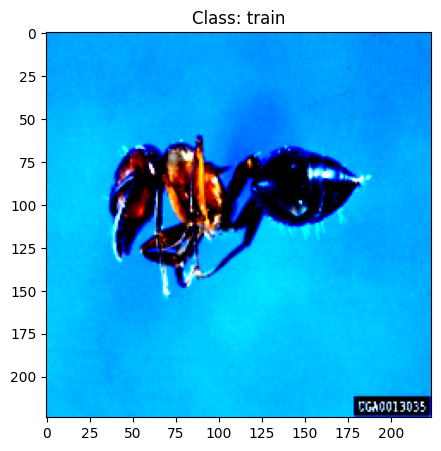

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

# Function to visualize a single instance
def imshow(img, title):
    """Function to show an image"""
    npimg = img.numpy()
    plt.figure(figsize=(5, 5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Get a sample image from each class from the training set
class_names = train_dataset.classes
num_classes = len(class_names)
print(num_classes)
samples_per_class = 1

for class_idx, class_name in enumerate(class_names):
    # Find a sample image for each class
    for i in range(samples_per_class):
        # Get the index of the sample image
        img_idx = [idx for idx, label in enumerate(train_dataset.targets) if label == class_idx][i]

        # Display the image
        img = train_dataset[img_idx][0]
        imshow(img, title=f"Class: {class_name}")


### Step 2: Modify a Pre-Trained Model

Next, we'll load a pre-trained model and modify its classifier to fit our new task.

In [ ]:
# Load the pre-trained model
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# Modify the classifier for the new dataset
num_features = model.fc.in_features
model.fc = models.Linear(num_features, 2)

### Step 3: Train the Model

Now, we can define the training loop.

In [ ]:
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # Number of epochs
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

### Step 4: Evaluate and Make Predictions

After training, we can evaluate the model on the validation set and make predictions.

In [ ]:
correct = 0
total = 0
model.eval()  # Set the model to evaluation mode

with torch.no_inference_mode():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct // total}%")

## Conclusion



Transfer learning opens up a realm of possibilities in deep learning projects. By utilizing pretrained models, you can accelerate development, conserve resources, and achieve remarkable results, even with limited data.

## References

- Li, Zhizhong, and Derek Hoiem. "Learning without forgetting." In European Conference on Computer Vision, pp. 614-629. Springer International Publishing, 2016: https://arxiv.org/pdf/1606.09282.pdf

- Introducing TorchVision’s New Multi-Weight Support API: https://pytorch.org/blog/introducing-torchvision-new-multi-weight-support-api/